In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.simplefilter('ignore')

#### Задание 1

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head(4)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
# e - eatable
# p - poisoned

#### Задание 2

In [7]:
le = LabelEncoder()

for i in df.columns:
    df[i]=le.fit_transform(df[i])
    
df.head(4)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5


In [8]:
plt.figure(figsize=(18, 18), dpi=500)

sns.heatmap(df.corr(), annot=True);

In [9]:
important_columns = ['bruises', 'gill-size', 'gill-color', 'ring-type', 'class']
df = df[important_columns]
inputs  = df.drop(columns=['class'])
outputs = df['class']
inputs.shape, outputs.shape

((8124, 4), (8124,))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25, random_state=41)

#### Задание 3

In [11]:
parameters = {'n_neighbors': [i for i in range(1, 8)]}
search = GridSearchCV(KNeighborsClassifier(), parameters)
search.fit(x_train, y_train)
search.best_params_,search.best_score_

({'n_neighbors': 5}, 0.94551241899266)

In [12]:
print(f'Train: {search.score(x_train, y_train)}')
print(f'Test: {search.score(x_test, y_test)}')

Train: 0.9438700147710487
Test: 0.9320531757754801


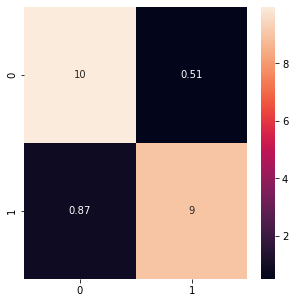

In [13]:
pred = search.predict(x_test)
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, pred) / 100
sns.heatmap(cm, annot=True);

In [14]:
def evaluate_results(y_test, pred):
    precision = round(precision_score(y_test, pred) * 100, 2)
    recall = round(recall_score(y_test, pred) * 100, 2)
    accuracy = round(accuracy_score(y_test, pred) * 100, 2)
    f1 = round(f1_score(y_test, pred) * 100, 2)
    
    return precision, recall, accuracy, f1

In [15]:
results = evaluate_results(y_test, pred)
print(f'Precision: {results[0]}%')
print(f'Recall: {results[1]}%')
print(f'Accuracy: {results[2]}%')
print(f'F1 Score: {results[3]}%')

Precision: 94.62%
Recall: 91.16%
Accuracy: 93.21%
F1 Score: 92.86%


#### Задание 4

In [16]:
mod_df = df.copy()
pos_ind = np.where(mod_df.iloc[:, -1].values == 1)[0]
np.random.shuffle(pos_ind)
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')

Using 979/3916 as positives and unlabeling the rest


In [17]:
pos_sample = pos_ind[:pos_sample_len]
mod_df['class_test'] = -1
mod_df.loc[pos_sample, 'class_test'] = 1
print('target variable:\n', mod_df.iloc[:, -1].value_counts())

target variable:
 -1    7145
 1     979
Name: class_test, dtype: int64


In [18]:
mod_df.head(4)

,bruises,gill-size,gill-color,ring-type,class,class_test
0,1,1,4,4,1,-1
1,1,0,4,4,0,-1
2,1,0,5,4,0,-1
3,1,1,5,4,1,-1


#### Задание 5

In [19]:
mod_df = mod_df.sample(frac=1)
neg_sample = mod_df[mod_df['class_test'] == -1][:len(mod_df[mod_df['class_test'] == 1])]
sample_test = mod_df[mod_df['class_test'] == -1][len(mod_df[mod_df['class_test'] == 1]):]
pos_sample = mod_df[mod_df['class_test'] == 1]
print(f'neg_sample_shape: {neg_sample.shape}, pos_sample_shape: {pos_sample.shape}')

neg_sample_shape: (979, 6), pos_sample_shape: (979, 6)


In [20]:
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

In [21]:
search = GridSearchCV(KNeighborsClassifier(), parameters)
search.fit(sample_train.iloc[:, :-2].values, 
           sample_train.iloc[:, -2].values)
search.best_params_,search.best_score_

({'n_neighbors': 5}, 0.9377042121196306)

In [22]:
print(f'Train: {search.score(sample_train.iloc[:, :-2].values, sample_train.iloc[:, -2].values)}')
print(f'Test: {search.score(sample_test.iloc[:, :-2].values, sample_test.iloc[:, -2].values)}')

Train: 0.940755873340143
Test: 0.9370742783003568


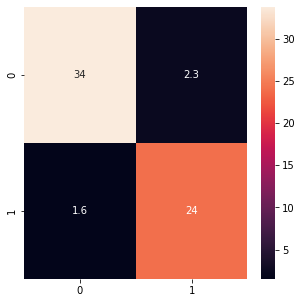

In [23]:
mod_pred = search.predict(sample_test.iloc[:, :-2].values)
plt.figure(figsize=(5, 5))
cm = confusion_matrix(sample_test.iloc[:, -2].values, mod_pred) / 100
sns.heatmap(cm, annot=True);

In [24]:
mod_results = evaluate_results(sample_test.iloc[:, -2].values, mod_pred)
print(f'Precision: {mod_results[0]}%')
print(f'Recall: {mod_results[1]}%')
print(f'Accuracy: {mod_results[2]}%')
print(f'F1 Score: {mod_results[3]}%')

Precision: 91.17%
Recall: 93.95%
Accuracy: 93.71%
F1 Score: 92.54%


#### Задание 6

In [25]:
pd.DataFrame(data={'Metrics': ['Precision', 'Recall', 'Accuracy', 'F1 Score'], 'Orig': results, 'Mod': mod_results})

,Metrics,Orig,Mod
0,Precision,94.62,91.17
1,Recall,91.16,93.95
2,Accuracy,93.21,93.71
3,F1 Score,92.86,92.54


Видим, что без применения random negative sampling выше Precision, а с применением random negative sampling выше Recall.

Accuracy чуть выше, если применять random negative sampling.

Если в задачах бизнеса стоит максимизировать Precision, то можно обойтись без применения random negative sampling.

В остальном же можно применять random negative sampling, так как Accuracy немного выше.

#### Задание 7

In [26]:
def do_task(p):
    mod_df = df.copy()
    pos_ind = np.where(mod_df.iloc[:, -1].values == 1)[0]
    np.random.shuffle(pos_ind)
    pos_sample_len = int(np.ceil(p * len(pos_ind)))
    print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest\n')

    pos_sample = pos_ind[:pos_sample_len]
    mod_df['class_test'] = -1
    mod_df.loc[pos_sample, 'class_test'] = 1
    print('target variable:\n', mod_df.iloc[:, -1].value_counts(), '\n')

    mod_df = mod_df.sample(frac=1)
    neg_sample = mod_df[mod_df['class_test'] == -1][:len(mod_df[mod_df['class_test'] == 1])]
    sample_test = mod_df[mod_df['class_test'] == -1][len(mod_df[mod_df['class_test'] == 1]):]
    pos_sample = mod_df[mod_df['class_test'] == 1]
    print(f'neg_sample_shape: {neg_sample.shape}, pos_sample_shape: {pos_sample.shape}\n')

    sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

    search = GridSearchCV(KNeighborsClassifier(), parameters)
    search.fit(sample_train.iloc[:, :-2].values, 
               sample_train.iloc[:, -2].values)
    search.best_params_,search.best_score_

    print(f'Train: {search.score(sample_train.iloc[:, :-2].values, sample_train.iloc[:, -2].values)}')
    print(f'Test: {search.score(sample_test.iloc[:, :-2].values, sample_test.iloc[:, -2].values)}\n')

    mod_pred = search.predict(sample_test.iloc[:, :-2].values)
    plt.figure(figsize=(5, 5))
    cm = confusion_matrix(sample_test.iloc[:, -2].values, mod_pred) / 100
    sns.heatmap(cm, annot=True);

    mod_results = evaluate_results(sample_test.iloc[:, -2].values, mod_pred)
    print(f'Precision: {mod_results[0]}%')
    print(f'Recall: {mod_results[1]}%')
    print(f'Accuracy: {mod_results[2]}%')
    print(f'F1 Score: {mod_results[3]}%')

##### 1) Уменьшим размер P

Using 784/3916 as positives and unlabeling the rest

target variable:
 -1    7340
 1     784
Name: class_test, dtype: int64 

neg_sample_shape: (784, 6), pos_sample_shape: (784, 6)

Train: 0.9470663265306123
Test: 0.9339536302623551

Precision: 90.98%
Recall: 93.87%
Accuracy: 93.4%
F1 Score: 92.4%


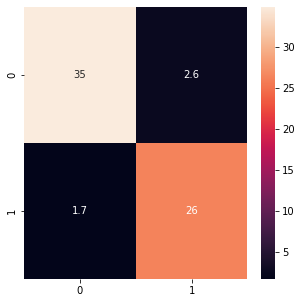

In [27]:
do_task(p=0.2)

##### 2) Увеличим размер P

Using 1175/3916 as positives and unlabeling the rest

target variable:
 -1    6949
 1    1175
Name: class_test, dtype: int64 

neg_sample_shape: (1175, 6), pos_sample_shape: (1175, 6)

Train: 0.9348936170212766
Test: 0.9350536889504676

Precision: 90.13%
Recall: 93.81%
Accuracy: 93.51%
F1 Score: 91.93%


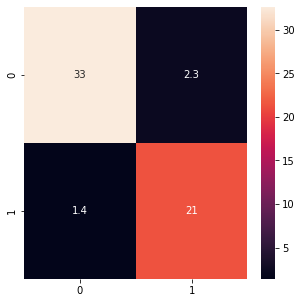

In [28]:
do_task(p=0.3)

Видим, что значения всех метрик падают как при уменьшении размера P, так и при его увеличении.

При уменьшении размера P выше Precision, Recall и, соответственно, F1 Score, но чуть хуже Accuracy, чем когда увеличиваем размер P.

В данном случае, оптимальным размером P является 0.25.